### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
import geopandas as gpd
import folium

%matplotlib inline
pd.set_option('display.max_columns', 25)

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


 - CRIM     CRIME    per capita crime rate by town
 - ZN       LOTS     proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    PRIVATE  proportion of non-retail business acres per town
 - CHAS     RIVER    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      AIR      nitric oxides concentration (parts per 10 million)
 - RM       ROOMS    average number of rooms per dwelling
 - AGE      AGE      proportion of owner-occupied units built prior to 1940
 - DIS      DISTANCE weighted distances to five Boston employment centres
 - RAD      HIGHWAY  index of accessibility to radial highways
 - TAX      TAX      full-value property-tax rate per Dollar 10,000
 - PTRATIO  SCHOOL   pupil-teacher ratio by town
 - B        BLACKS   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    STATUS   % lower status of the population
 - MEDV     PRICE    Median value of owner-occupied homes in Dollar 1000's

In [33]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


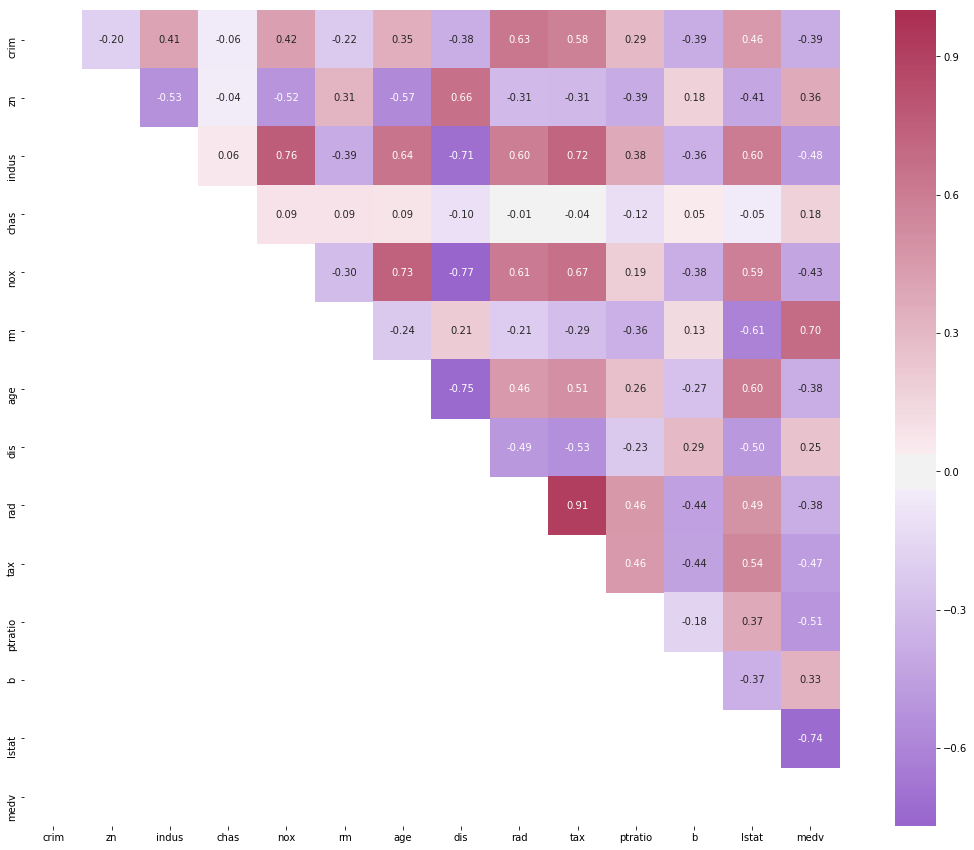

In [11]:
# check correlations

corrs = dataset.corr()

mask = np.zeros_like(corrs)
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(280, 0, l=40, as_cmap=True)
#bottom, top = ax.get_ylim()
hm = sns.heatmap(corrs, cbar=True, mask=mask, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap=cmap, center=0, )
plt.show()

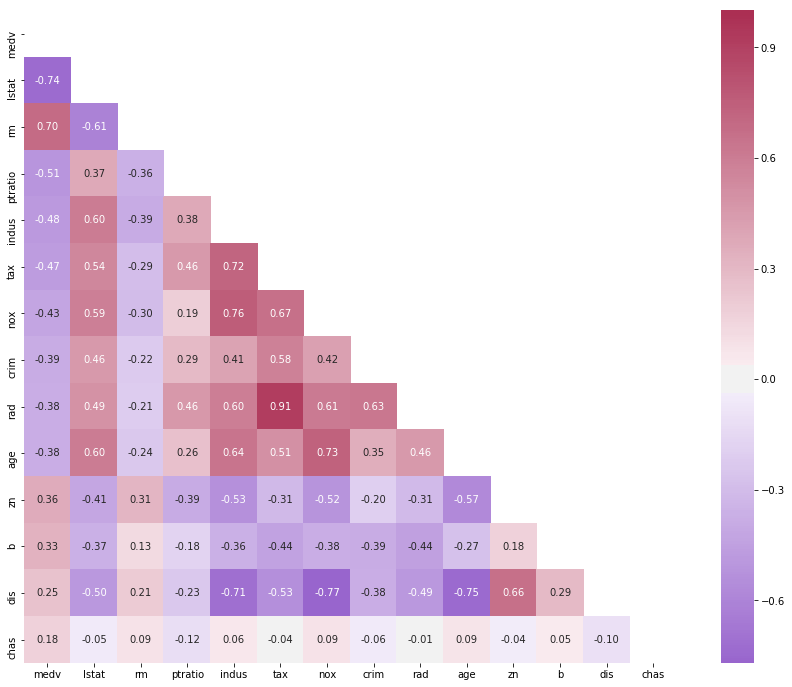

In [13]:
f, ax = plt.subplots(figsize=(16, 12))
k = 15 #number of variables for heatmap

mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
cols = corrs.apply(abs).nlargest(k, 'medv')['medv'].index
cm = np.corrcoef(dataset[cols].values.T)
hm = sns.heatmap(cm, cbar=True, mask=mask, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap=cmap, center=0, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

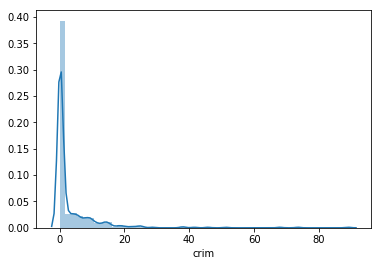

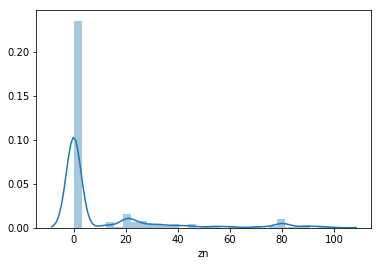

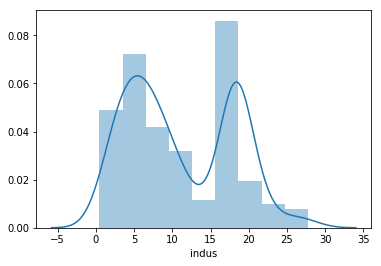

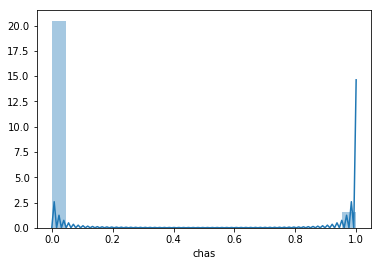

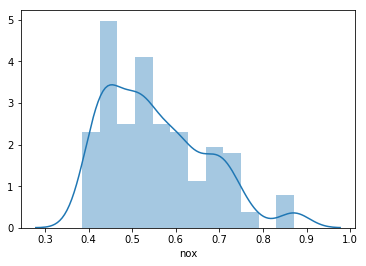

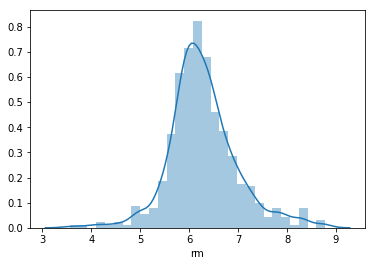

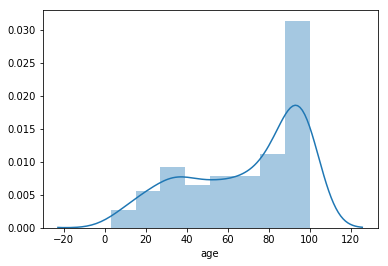

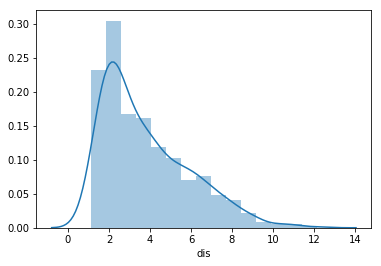

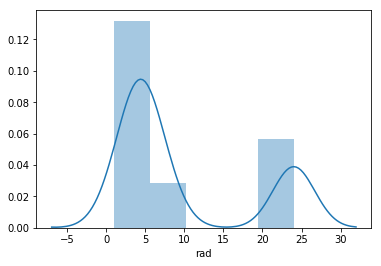

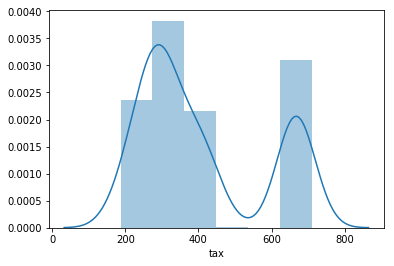

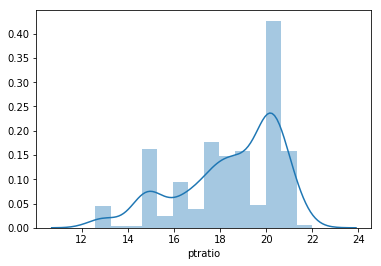

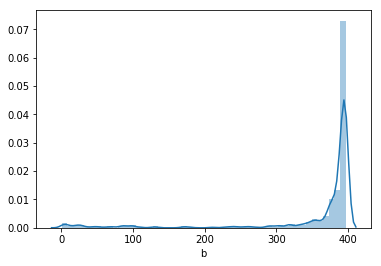

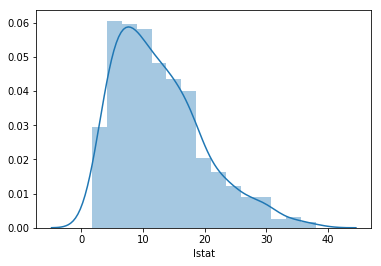

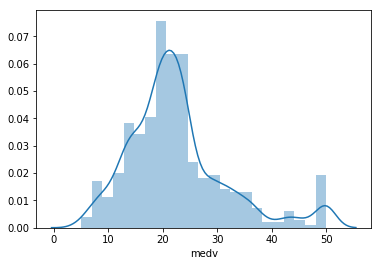

In [8]:
for i in list(dataset):
    plt.show(sns.distplot(dataset[i]))

# Regression

In [21]:
X = dataset[['lstat', 'rm', 'ptratio']]
y = dataset.medv

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#print(lin_reg.get_params())
#print(lin_reg.coef_)
from sklearn.metrics import mean_squared_error, r2_score
y_1 = lin_reg.predict(X_train)
r2_score(y_train, y_1)

0.7197461706388137

In [36]:
y_2 = lin_reg.predict(X_test)
r2_score(y_test, y_2)

0.5078324454588076

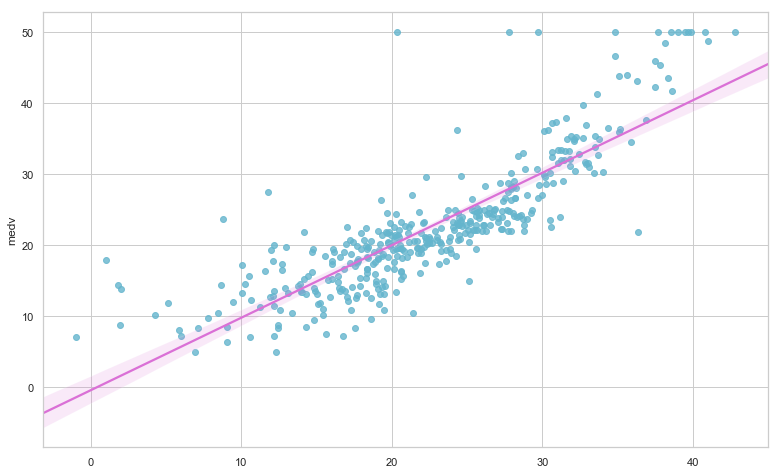

In [73]:
sns.set(style='whitegrid')
plt.figure(figsize = (13,8))
sns.regplot(y_1, y_train, scatter_kws = {'color':'c'}, color='Orchid')
sns.set(font_scale = 1.3)

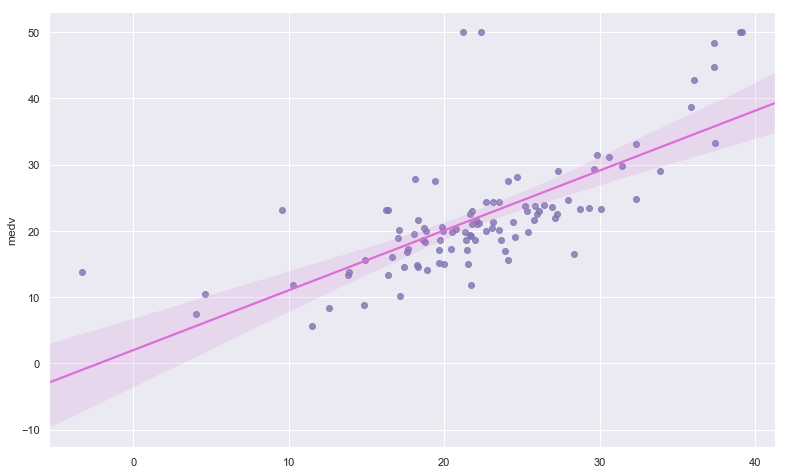

In [71]:
sns.set(style='darkgrid')
plt.figure(figsize = (13,8))
sns.regplot(y_2, y_test, scatter_kws = {'color':'m'}, color='Orchid')
sns.set(font_scale = 1.3)

## Polynomial

In [52]:
poly_reg = preprocessing.PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
m_poly = pol_reg.fit(X_poly, y_train)

In [54]:
y_3 = pol_reg.predict(X_poly)
r2_score(y_train, y_3)

0.8335615489035173

In [74]:
y_4 = pol_reg.fit(poly_reg.fit_transform(X_test), y_test)
r2_score(y_test, y_4)

TypeError: Expected sequence or array-like, got estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)